<a href="https://colab.research.google.com/github/OliveiraGmo/Machine-learning/blob/main/Calculos_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q tensorflow
!pip instal -q keras

ERROR: unknown command "instal" - maybe you meant "install"


In [3]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


import numpy as np

import seaborn as sns

import pandas as pd

In [4]:
tf.__version__


'2.17.1'

In [5]:
%load_ext tensorboard

In [6]:
logdir='log'

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 39ms/step - accuracy: 0.9030 - loss: 0.3167 - val_accuracy: 0.9851 - val_loss: 0.0451
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 34ms/step - accuracy: 0.9846 - loss: 0.0484 - val_accuracy: 0.9846 - val_loss: 0.0483
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.9904 - loss: 0.0312 - val_accuracy: 0.9903 - val_loss: 0.0313
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.9927 - loss: 0.0254 - val_accuracy: 0.9878 - val_loss: 0.0386
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.9946 - loss: 0.0176 - val_accuracy: 0.9830 - val_loss: 0.0574


In [11]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1) # Use np.argmax to get predicted class indices

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [12]:
classes=[0,1,2,3,4,5,6,7,8,9]

<function matplotlib.pyplot.show(close=None, block=None)>

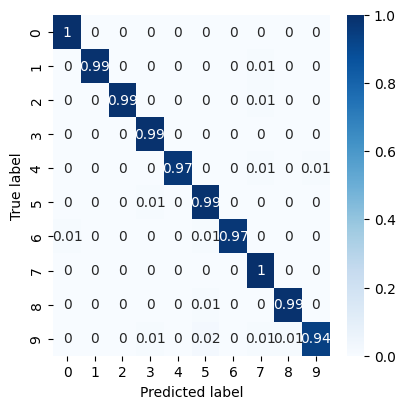

In [36]:
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(4,4))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show

In [65]:
#Doing the metrics with base the graph
vp = np.trace(con_mat_df)
fn = (con_mat_df.loc[6,0]+con_mat_df.loc[5,3]+con_mat_df.loc[9,3]+con_mat_df.loc[6,5]+con_mat_df.loc[8,5]+con_mat_df.loc[9,5]+con_mat_df.loc[1,7]+con_mat_df.loc[2,7]+con_mat_df.loc[4,7]+con_mat_df.loc[9,7]++con_mat_df.loc[9,8]++con_mat_df.loc[4,9])
vn = (con_mat_df.loc[2,7]+con_mat_df.loc[4,7]+con_mat_df.loc[7,9]+con_mat_df.loc[6,0]+con_mat_df.loc[6,5]+con_mat_df.loc[8,5]+con_mat_df.loc[9,3]+con_mat_df.loc[9,5]+con_mat_df.loc[9,7]+con_mat_df.loc[9,8])
fp = (con_mat_df.loc[1,7]+con_mat_df.loc[2,7]+con_mat_df.loc[4,7]+con_mat_df.loc[6,0]+con_mat_df.loc[6,5]+con_mat_df.loc[8,5]+con_mat_df.loc[9,3]+con_mat_df.loc[9,5]+con_mat_df.loc[9,7]+con_mat_df.loc[9,8])
sensitivity= vp/(vp+fn)
precision= vp/(vp+fp)
print(f"Sensitivity or Recall: {sensitivity}")
print(f"Precision is {precision}")
print(f"Accuracy is {(vp+vn)/(vp+vn+fp+fn)}")
print(f"F1 Score is {2*(sensitivity*precision)/(sensitivity+precision)}")




Sensitivity or Recall: 0.9869477911646586
Precision is 0.988933601609658
Accuracy is 0.976401179941003
F1 Score is 0.9879396984924623


In [66]:
# Acurácia
accur = metrics.accuracy_score(y_true, y_pred)
print(f"Acurácia: {accur}")

# Precisão
prec = metrics.precision_score(y_true, y_pred, average='weighted')
print(f"Precisão: {prec}")

# Recall
rec = metrics.recall_score(y_true, y_pred, average='weighted')
print(f"Recall: {rec}")

# F1-Score
score = metrics.f1_score(y_true, y_pred, average='weighted')
print(f"F1-Score: {score}")



Acurácia: 0.983
Precisão: 0.9833190945667031
Recall: 0.983
F1-Score: 0.9829805337962382


In [25]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
confusion_explanation = metrics.classification_report(y_true, y_pred, target_names=class_names)
print(confusion_explanation)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.96      0.99      0.97       892
           6       0.99      0.97      0.98       958
           7       0.96      1.00      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.94      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

